In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.integrate as sc
#plt.rcParams.update({   "text.usetex": True,})
import scipy.interpolate

In [2]:
#kvec = np.logspace(1e-3,1e1,20)#
kvec = [1e-1,1,1e1]
Omega_M = 0.3
Omega_R = 7e-5
Omega_lambda = 1 - Omega_M - Omega_R
Tv_k = 1.947
# in MeV
kb = 8.617e-11 # MeV/K
T0 = Tv_k * kb
mv_test = 0.3 
H0 = 67 / (3*1e5) # i 1/Mpc

cosmo_dict ={'H0':70,  'Omega_cdm':0.3, 'k_output_values':str(kvec).strip('[]'), "N_ncdm":1,
             "m_ncdm":mv_test # massen er givet i eV s' jeg min egen test m_v skal være en faktor  1e-6 mindre
           ,'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',
            "ncdm_fluid_approximation":3
            }

cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
bg = cosmo.get_background()

pts = cosmo.get_perturbations()['scalar']
print(bg.keys())
pts0=pts[0]
pts_sidst=pts[-1]
print(f"{pts0.keys()=}")
#print( cosmo.Hubble(0))
z = bg["z"]
a = 1/(z+1)
aend = a[-1]
a0 = a[0]

mv = mv_test * 1e-6

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])
pts0.keys()=dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'delta_ncdm[0]', 'theta_ncdm[0]', 'shear_ncdm[0]', 'cs2_ncdm[0]'])


# X



# Alle ligningerne

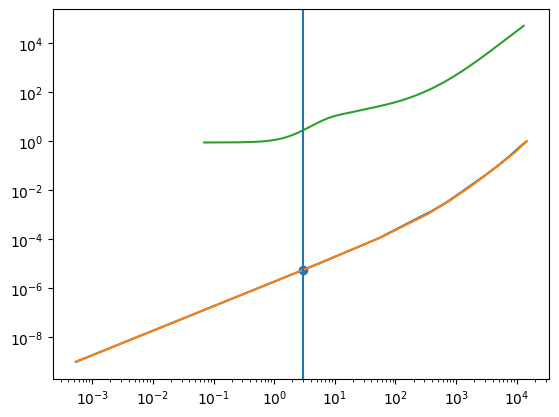

In [181]:
x = 3
k_ind = 1
k = kvec[k_ind]

T_ini = x / k


# udregner Hubbleparameteren

def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) 

# udregnger tau 

def tau_cal(a,y):
    # Vores "tids"-værdi i denne differentialligning er a
    tau = y[0]
    d_tau = 1 / (a ** 2 * H(a))
    return np.array(d_tau)

# temperatur

def Tv(a):
    return T0 / a # in MeV

# lydhastighed

def cs(a,mv,factor):
    return factor * Tv(a) / mv

# udregn a
def a_solve(tau,y):
    a = y[0]
    a_dt = a * a * H(a)
    return [a_dt]




tau_init =   (1/H0) * (Omega_R ** (-0.5)) * a0


sol_tau = sc.solve_ivp(tau_cal,t_span=[a0,aend],y0=[tau_init])
tau = sol_tau.y[0]


sol_a = sc.solve_ivp(a_solve,t_span=[tau[0],tau[-1]],y0=[a0])
a_tau = sol_a.t
a = sol_a.y[0]

#print(a[0],a[-1])

a_interp = scipy.interpolate.interp1d(a_tau,a)
#print(a_interp(14550))

plt.loglog(tau,a_interp(tau))
plt.loglog(a_tau,a)

#plt.loglog(a,a_tau)
plt.scatter(T_ini,a_interp(T_ini))




delta_class = pts[k_ind]["delta_cdm"]
theta_class = pts[k_ind]["theta_cdm"]
tau_class = pts[k_ind]["tau [Mpc]"]
delta_init = scipy.interpolate.interp1d(tau_class,delta_class)(T_ini)
theta_init = scipy.interpolate.interp1d(tau_class,theta_class)(T_ini)
# = np.interp(T_ini,tau_class,delta_class)
#np.interp(T_ini,)
delta_neutrino_class = pts[k_ind]["delta_ncdm[0]"]
theta_neutrino_class = pts[k_ind]["theta_ncdm[0]"]


a_class = pts[k_ind]["a"]

delta_neutrino_init = scipy.interpolate.interp1d(tau_class,delta_neutrino_class)(T_ini)
theta_neutrino_init = scipy.interpolate.interp1d(tau_class,theta_neutrino_class)(T_ini)

plt.plot(tau_class,-delta_class)
plt.axvline(T_ini)
plt.scatter(T_ini,delta_init,c="red")

# Loader vi en masse class værdier ind

In [74]:


delta_class = pts[k_ind]["delta_cdm"]
theta_class = pts[k_ind]["theta_cdm"]
tau_class = pts[k_ind]["tau [Mpc]"]
delta_init = scipy.interpolate.interp1d(tau_class,delta_class)(T_ini)
theta_init = scipy.interpolate.interp1d(tau_class,theta_class)(T_ini)
# = np.interp(T_ini,tau_class,delta_class)
#np.interp(T_ini,)
delta_neutrino_class = pts[k_ind]["delta_ncdm[0]"]
theta_neutrino_class = pts[k_ind]["theta_ncdm[0]"]


a_class = pts[k_ind]["a"]

delta_neutrino_init = scipy.interpolate.interp1d(tau_class,delta_neutrino_class)(T_ini)
theta_neutrino_init = scipy.interpolate.interp1d(tau_class,theta_neutrino_class)(T_ini)




Text(0.5, 1.0, 'Class løsninger for cdm og neutrinoer for k = 1')

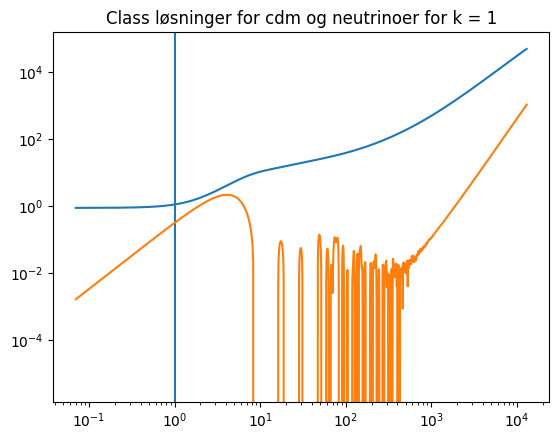

In [56]:
plt.loglog(tau_class,-delta_class)
plt.axvline(T_ini)
plt.loglog(tau_class,-delta_neutrino_class)
plt.title("Class løsninger for cdm og neutrinoer for k = %s" %k)

# Metode 1 

In [113]:

def cdm_solve(t,y):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    #print(f"{a=}",f"{t=}")
    d_delta   = - theta
    nabla2phi = (3/2) * H(a)*H(a) * Omega_M * delta *a**2
    d_theta   = - nabla2phi  -  H(a) * theta*a
    return [d_delta,d_theta]

y0 = [delta_init, theta_init]
t_span = [T_ini,tau[-1]]
sol_cdm = sc.solve_ivp(cdm_solve,
                       t_span= t_span,
                       y0 = y0)
tau_e = sol_cdm.t
delta_cdm = sol_cdm.y[0]
delta_interp = scipy.interpolate.interp1d(tau_e,delta_cdm)
#plt.axvline(a_interp(T_ini))


def neutrino_solve(t,y,k,mv,factor):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    delta_cdm = delta_interp(t)
    d_delta   = - theta
    nabla2phi = (3/2) * H(a)**2 * Omega_M * delta_cdm * a**2
    
    d_theta   = - H(a) * theta *a - nabla2phi + k*k * cs(a,mv,factor)**2 * delta
    #print([d_delta,d_theta])
    return [d_delta,d_theta]

y0_neutrino = [delta_neutrino_init,theta_neutrino_init]
factor =0#1.68
sol_neutrino = sc.solve_ivp(neutrino_solve,t_span = t_span,y0 = y0_neutrino,args=(k,mv,factor))
neutrino = sol_neutrino.y[0]
tau_neu = sol_neutrino.t


'plt.figure(1231)\nplt.loglog(tau_class,delta_neutrino_class/delta_neutrino_class[-1],label="class neutrino delta")\nplt.loglog((tau_neu),neutrino/neutrino[-1],label="min neutrino")\n\nplt.loglog((tau_e),delta_cdm/delta_cdm[-1],label="min delta-cdm")\nplt.loglog(tau_class,delta_class/delta_class[-1],label="class delta_cdm")\nplt.axvline(T_ini)\nplt.legend()\nplt.title("Class løsninger for cdm og neutrinoer for k = %s normaliseret" %k)\n\nplt.axvline(T_ini)'

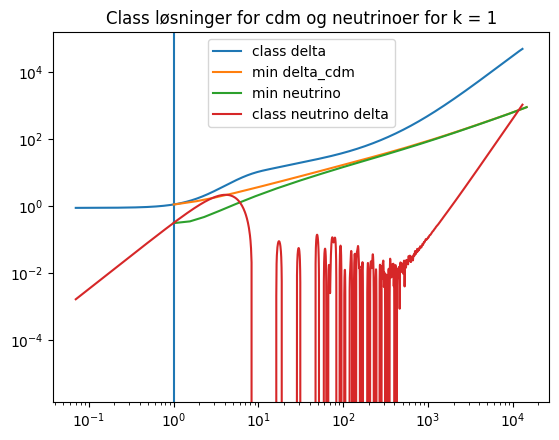

In [114]:
plt.loglog(tau_class,-delta_class,label="class delta")
plt.axvline(T_ini)

plt.title("Class løsninger for cdm og neutrinoer for k = %s" %k)

plt.loglog((tau_e),-delta_cdm,label="min delta_cdm")#/delta_cdm[-1])
plt.loglog((tau_neu),-neutrino,label= "min neutrino")#/neutrino[-1])
plt.loglog(tau_class,-delta_neutrino_class,label="class neutrino delta")
plt.legend()
"""plt.figure(1231)
plt.loglog(tau_class,delta_neutrino_class/delta_neutrino_class[-1],label="class neutrino delta")
plt.loglog((tau_neu),neutrino/neutrino[-1],label="min neutrino")

plt.loglog((tau_e),delta_cdm/delta_cdm[-1],label="min delta-cdm")
plt.loglog(tau_class,delta_class/delta_class[-1],label="class delta_cdm")
plt.axvline(T_ini)
plt.legend()
plt.title("Class løsninger for cdm og neutrinoer for k = %s normaliseret" %k)

plt.axvline(T_ini)"""



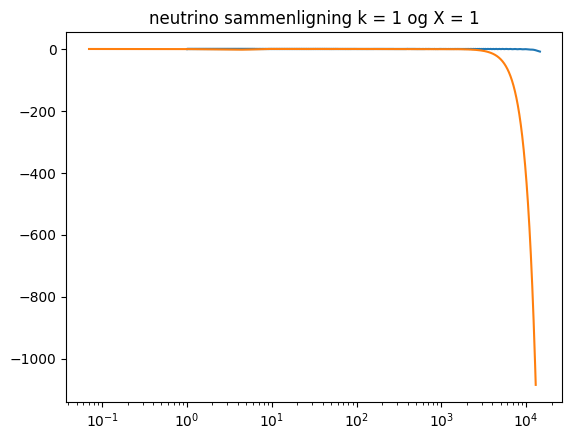

In [72]:
plt.figure(123)
plt.title("neutrino sammenligning k = %s og X = %s"% (k,x))

plt.semilogx(tau_neu,neutrino)#/neutrino[-1])
plt.semilogx(tau_class,delta_neutrino_class)#/delta_neutrino_class[-1])



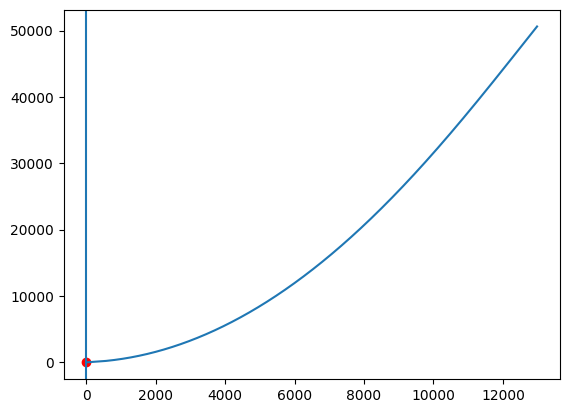

# I differentialligninen før kiggede vi kun på cdm, her kigger vi også på neutrinoer.

/tmp/ipykernel_218/2388276441.py:6: RuntimeWarning: overflow encountered in double_scalars
  nabla2phi = (3/2) * H(a)*H(a) * Omega_M * delta
/tmp/ipykernel_218/2388276441.py:7: RuntimeWarning: overflow encountered in double_scalars
  d_theta   = -  H(a) * theta - nabla2phi
/tmp/ipykernel_218/2388276441.py:7: RuntimeWarning: invalid value encountered in double_scalars
  d_theta   = -  H(a) * theta - nabla2phi


Text(0.5, 0, 'a')

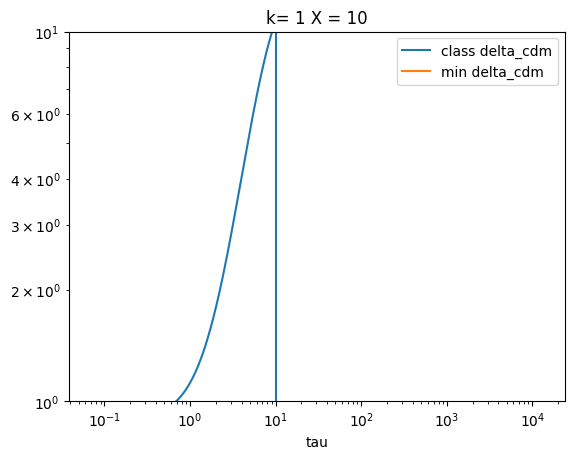

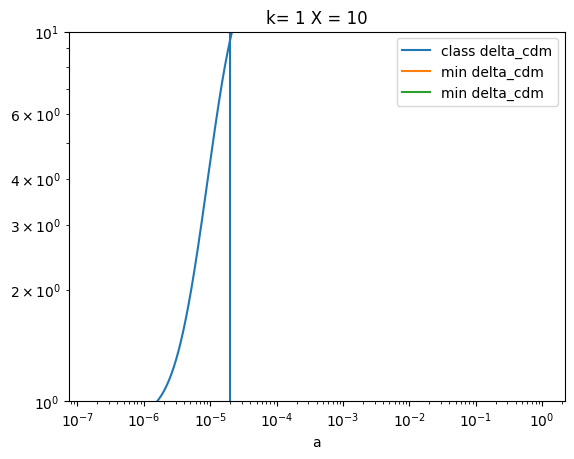

In [31]:


def cdm_solve(t,y):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    d_delta   = - theta
    nabla2phi = (3/2) * H(a)*H(a) * Omega_M * delta
    d_theta   = -  H(a) * theta - nabla2phi
    return [d_delta,d_theta]
    
    
y0 = [delta_init, theta_init]

t_span = [T_ini,tau[-1]]

sol_cdm = sc.solve_ivp(cdm_solve,
                       t_span= t_span,
                       y0 = y0)
tau_e = sol_cdm.t
delta_cdm = sol_cdm.y[0]


delta_interp = scipy.interpolate.interp1d(tau_e,delta_cdm)
def neutrino_solve(t,y,k,mv):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    delta_cdm = delta_interp(t)
    d_delta   = - theta
    nabla2phi = (3/2) * H(a)**2 * Omega_M * delta_cdm
    
    d_theta   = - H(a) * theta - nabla2phi + k*k * cs(a,mv)**2 * delta
    #print([d_delta,d_theta])
    return [d_delta,d_theta]

y0_neutrino = [delta_neutrino_init,theta_neutrino_init]

sol_neutrino = sc.solve_ivp(neutrino_solve,t_span = t_span,y0 = y0_neutrino,args=(k,mv))
neutrino = sol_neutrino.y[0]
tau_neu = sol_neutrino.t


plt.loglog(tau_class,-delta_class,label="class delta_cdm")
plt.loglog((tau_e),-delta_cdm,label="min delta_cdm")

#plt.loglog(tau_class,-delta_neutrino_class,label="class delta_neutrino")
#plt.loglog((tau_neu),-neutrino,label="min delta_neutrino")
plt.legend()
plt.axvline(T_ini)
plt.title("k= %s X = %s" %(k,x))
plt.xlabel("tau")


plt.figure(132)

plt.loglog(a_class,-delta_class,label="class delta_cdm")
plt.loglog(a_interp(tau_e),-delta_cdm,label="min delta_cdm")
plt.loglog(a_interp(tau_e),delta_cdm,label="min delta_cdm")
plt.legend()
plt.axvline(a_interp(T_ini))
plt.title("k= %s X = %s" %(k,x))
plt.xlabel("a")




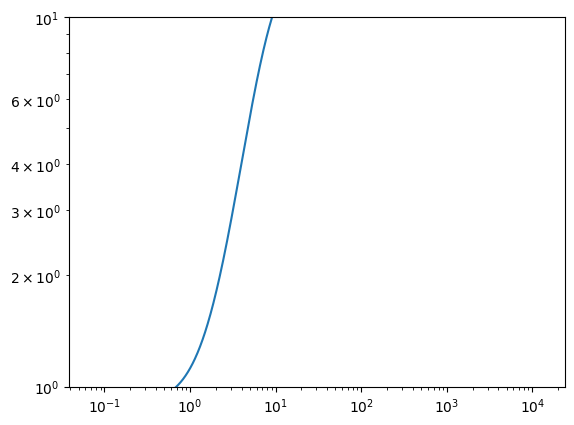

In [10]:

plt.loglog(tau_class,-delta_class)
plt.loglog((tau_e),-delta_cdm)
#plt.loglog((tau_neu), -neutrino)
#plt.loglog(tau_class,-delta_neutrino_class)


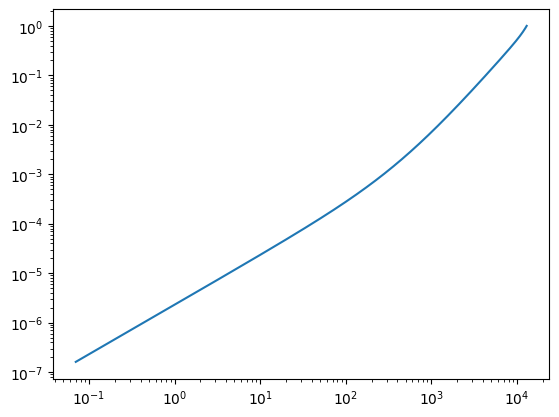

In [11]:
plt.loglog(pts[k]["tau [Mpc]"],pts[k]["a"])

# Method 2

In [39]:
def growth_func(t,y,k,mv):
    delta = y[0]
    d_delta_dt = y[1]
    a = a_interp(t)
    delta_cdm = delta_interp(t)
    d2_delta_dt2 = a * H(a) * (-d_delta_dt) + 3/2 *a**2* H(a)**2 * Omega_M * delta_cdm - k**2 * cs(a,mv) * delta
    return [d_delta_dt, d2_delta_dt2]



d_delta_dt0 = theta_neutrino_init
delta0 = delta_neutrino_init
y0 = [delta0,d_delta_dt0]
sol = sc.solve_ivp(growth_func,t_span=t_span,y0=y0,args=(k,mv))
plt.loglog(sol.t,-sol.y[0])
plt.loglog(sol.t,sol.y[0])



ValueError: A value in x_new is above the interpolation range.

# Method 3


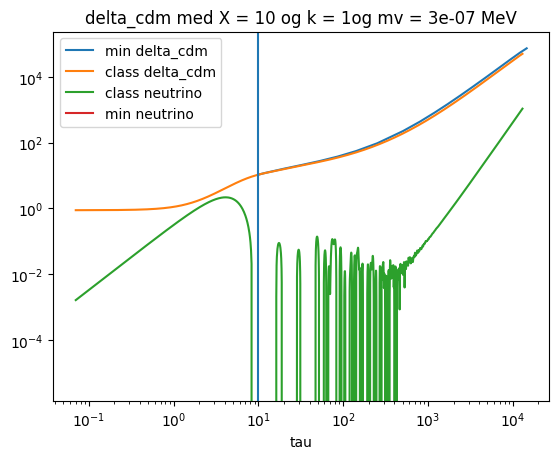

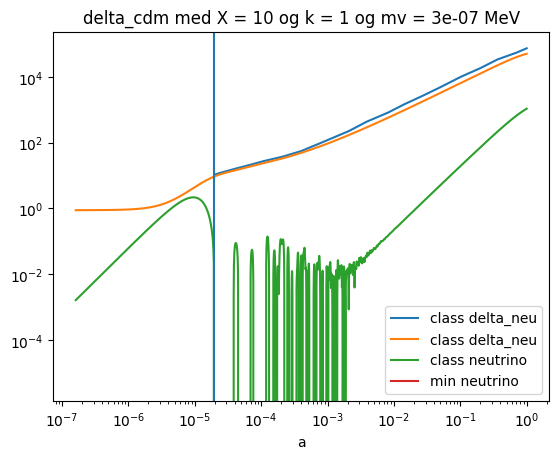

In [45]:
def dcm_func(t,y):
    delta = y[0]
    theta = y[1]    
    a = a_interp(t)
    d_delta   = - theta
    nabla2phi = (3/2) * H0*H0 * Omega_M * delta / a
    d_theta   =  - nabla2phi-  H(a) * theta * a
    return [d_delta,d_theta]

y0 = [delta_init,theta_init]

sol_cdm = sc.solve_ivp(dcm_func, t_span = t_span, y0 = y0)

t_cdm = sol_cdm.t
delta_cdm = sol_cdm.y[0]


delta_cdm_interp = scipy.interpolate.interp1d(t_cdm,delta_cdm)


def neutrino_delta(t,y,k,mv):
    delta = y[0]
    theta = y[1]    
    a = a_interp(t)
    delta_cdm = delta_cdm_interp(t)
    d_delta   = - theta
    nabla2phi = (3/2) * H0*H0 * Omega_M * delta_cdm / a
    d_theta   = - a* H(a) * theta - nabla2phi - k**2 * cs(a,mv)**2 * delta
    return [d_delta,d_theta]


y0 = [delta_neutrino_init,theta_neutrino_init]
sol_neu = sc.solve_ivp(neutrino_delta,t_span, y0 = y0,args=(k,mv))
t_neu = sol_neu.t
delta_neu = sol_neu.y[0]



plt.loglog(t_cdm,-delta_cdm,label="min delta_cdm")
plt.loglog(tau_class,-delta_class,label="class delta_cdm")

plt.loglog(tau_class,-delta_neutrino_class,label="class neutrino")
plt.loglog(t_neu,-delta_neu,label="min neutrino")

plt.axvline(T_ini)

plt.title("delta_cdm med X = %s og k = %sog mv = %s MeV" %(x,k,mv))
plt.xlabel("tau")



plt.legend()
plt.figure(123)

plt.loglog(a_interp(t_cdm),-delta_cdm,label="class delta_neu")
plt.loglog(a_class,-delta_class,label="class delta_neu")


plt.loglog(a_class,-delta_neutrino_class,label="class neutrino")
plt.loglog(a_interp(t_neu),-delta_neu,label="min neutrino")

plt.title("delta_cdm med X = %s og k = %s og mv = %s MeV" %(x,k,mv))
plt.xlabel("a")
plt.axvline(a_interp(T_ini))
plt.legend()

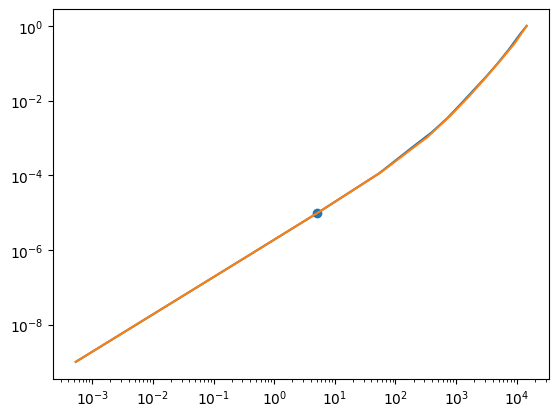

In [141]:
x = 5
k_ind = 1
k = kvec[k_ind]

T_ini = x / k


# udregner Hubbleparameteren

def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) 

# udregnger tau 

def tau_cal(a,y):
    # Vores "tids"-værdi i denne differentialligning er a
    tau = y[0]
    d_tau = 1 / (a ** 2 * H(a))
    return np.array(d_tau)

# temperatur

def Tv(a):
    return T0 / a # in MeV

# lydhastighed

def cs(a,mv,factor):
    return factor * Tv(a) / mv

# udregn a
def a_solve(tau,y):
    a = y[0]
    a_dt = a * a * H(a)
    return [a_dt]




tau_init =   (1/H0) * (Omega_R ** (-0.5)) * a0


sol_tau = sc.solve_ivp(tau_cal,t_span=[a0,aend],y0=[tau_init])
tau = sol_tau.y[0]


sol_a = sc.solve_ivp(a_solve,t_span=[tau[0],tau[-1]],y0=[a0])
a_tau = sol_a.t
a = sol_a.y[0]

#print(a[0],a[-1])

a_interp = scipy.interpolate.interp1d(a_tau,a)
#print(a_interp(14550))

plt.loglog(tau,a_interp(tau))
plt.loglog(a_tau,a)

#plt.loglog(a,a_tau)
plt.scatter(T_ini,a_interp(T_ini))




delta_class = pts[k_ind]["delta_cdm"]
theta_class = pts[k_ind]["theta_cdm"]
tau_class = pts[k_ind]["tau [Mpc]"]
delta_init = scipy.interpolate.interp1d(tau_class,delta_class)(T_ini)
theta_init = scipy.interpolate.interp1d(tau_class,theta_class)(T_ini)
# = np.interp(T_ini,tau_class,delta_class)
#np.interp(T_ini,)
delta_neutrino_class = pts[k_ind]["delta_ncdm[0]"]
theta_neutrino_class = pts[k_ind]["theta_ncdm[0]"]


a_class = pts[k_ind]["a"]

delta_neutrino_init = scipy.interpolate.interp1d(tau_class,delta_neutrino_class)(T_ini)
theta_neutrino_init = scipy.interpolate.interp1d(tau_class,theta_neutrino_class)(T_ini)

#plt.plot(tau_class,-delta_class)
#plt.axvline(T_ini)
#plt.scatter(T_ini,delta_init,c="red")


# Method 4

Text(0.5, 0, 'Tau')

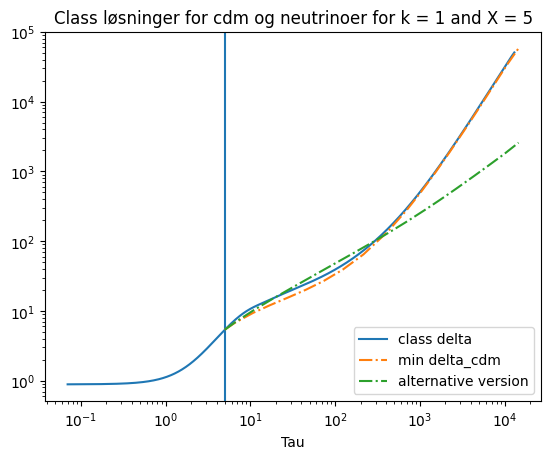

In [145]:

def cdm_solve(t,y):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    #print(f"{a=}",f"{t=}")
    d_delta   = - theta
    nabla2phi = (3/2) * H0**2 * Omega_M * delta / a
    d_theta   = - nabla2phi  -  H(a) * theta*a
    return [d_delta,d_theta]

y0 = [delta_init, theta_init]
t_span = [T_ini,tau[-1]]
sol_cdm = sc.solve_ivp(cdm_solve,
                       t_span= t_span,
                       y0 = y0)
tau_e = sol_cdm.t
delta_cdm = sol_cdm.y[0]
delta_interp = scipy.interpolate.interp1d(tau_e,delta_cdm)
#plt.axvline(a_interp(T_ini))


def neutrino_solve(t,y,k,mv,factor):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    delta_cdm = delta_interp(t)
    d_delta   = - theta
    nabla2phi = (3/2) * H(a)**2 * Omega_M * delta_cdm * a**2
    
    d_theta   = - H(a) * theta *a - nabla2phi + k*k * cs(a,mv,factor)**2 * delta
    #print([d_delta,d_theta])
    return [d_delta,d_theta]

y0_neutrino = [delta_neutrino_init,theta_neutrino_init]
factor =0.0168
sol_neutrino = sc.solve_ivp(neutrino_solve,t_span = t_span,y0 = y0_neutrino,args=(k,mv,factor))
neutrino = sol_neutrino.y[0]
tau_neu = sol_neutrino.t

plt.axvline(T_ini)

plt.title("Class løsninger for cdm og neutrinoer for k = %s and X = %s" %(k,x))
#/delta_cdm[-1])
#plt.loglog((tau_neu),-neutrino,label= "min neutrino")#/neutrino[-1])
#plt.loglog(tau_class,-delta_neutrino_class,label="class neutrino delta")

"""plt.figure(1231)
plt.loglog(tau_class,delta_neutrino_class/delta_neutrino_class[-1],label="class neutrino delta")
plt.loglog((tau_neu),neutrino/neutrino[-1],label="min neutrino")

plt.loglog((tau_e),delta_cdm/delta_cdm[-1],label="min delta-cdm")
plt.loglog(tau_class,delta_class/delta_class[-1],label="class delta_cdm")
plt.axvline(T_ini)
plt.legend()
plt.title("Class løsninger for cdm og neutrinoer for k = %s normaliseret" %k)

plt.axvline(T_ini)"""


plt.loglog(tau_class,-delta_class,label="class delta")
plt.loglog((tau_e),-delta_cdm,"-.",label="min delta_cdm")

def cdm_2_solve(t,y):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    #print(f"{a=}",f"{t=}")
    d_delta   = - theta
    nabla2phi = (3/2) * H(a)*H(a) * Omega_M * delta *a**2
    d_theta   = - nabla2phi  -  H(a) * theta*a
    return [d_delta,d_theta]

y0 = [delta_init, theta_init]
t_span = [T_ini,tau[-1]]
sol_cdm = sc.solve_ivp(cdm_2_solve,
                       t_span= t_span,
                       y0 = y0)
tau_e = sol_cdm.t
delta_cdm = sol_cdm.y[0]
#plt.loglog(tau_class,-delta_class,label="class delta")
plt.loglog(tau_e,-delta_cdm,"-.",label="alternative version")

plt.legend()
plt.xlabel("Tau")

Text(0.5, 0, 'Tau')

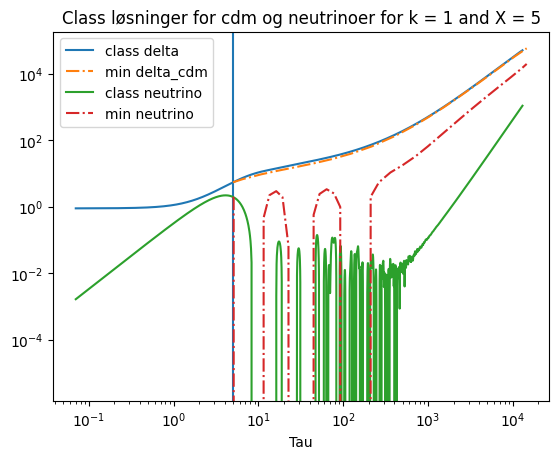

In [149]:

def cdm_solve(t,y):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    #print(f"{a=}",f"{t=}")
    d_delta   = - theta
    nabla2phi = (3/2) * H0**2 * Omega_M * delta / a
    d_theta   = - nabla2phi  -  H(a) * theta*a
    return [d_delta,d_theta]

y0 = [delta_init, theta_init]
t_span = [T_ini,tau[-1]]
sol_cdm = sc.solve_ivp(cdm_solve,
                       t_span= t_span,
                       y0 = y0)
tau_e = sol_cdm.t
delta_cdm = sol_cdm.y[0]
delta_interp = scipy.interpolate.interp1d(tau_e,delta_cdm)
#plt.axvline(a_interp(T_ini))


def neutrino_solve(t,y,k,mv,factor):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    delta_cdm = delta_interp(t)
    d_delta   = - theta
    nabla2phi = (3/2) * H(a)**2 * Omega_M * delta_cdm * a**2
    
    d_theta   = - H(a) * theta *a - nabla2phi + k*k * cs(a,mv,factor)**2 * delta
    #print([d_delta,d_theta])
    return [d_delta,d_theta]

y0_neutrino = [delta_neutrino_init,theta_neutrino_init]
factor =0.0168
sol_neutrino = sc.solve_ivp(neutrino_solve,t_span = t_span,y0 = y0_neutrino,args=(k,mv,factor))
neutrino = sol_neutrino.y[0]
tau_neu = sol_neutrino.t

plt.axvline(T_ini)

plt.title("Class løsninger for cdm og neutrinoer for k = %s and X = %s" %(k,x))


plt.loglog(tau_class,-delta_class,label="class delta")
plt.loglog((tau_e),-delta_cdm,"-.",label="min delta_cdm")
plt.loglog(tau_class,-delta_neutrino_class,label="class neutrino")

plt.loglog(tau_neu,-neutrino,"-.",label="min neutrino")

plt.legend()
plt.xlabel("Tau")

In [152]:

def cdm_solve(t,y):    
    delta     = y[0]
    theta     = y[1]
    a = a_interp(t)
    #print(f"{a=}",f"{t=}")
    d_delta   = - theta
    nabla2phi = (3/2) * H0**2 * Omega_M * delta / a
    d_theta   = - nabla2phi  -  H(a) * theta*a
    return [d_delta,d_theta]

y0 = [delta_init, theta_init]
t_span = [T_ini,tau[-1]]
sol_cdm = sc.solve_ivp(cdm_solve,
                       t_span= t_span,
                       y0 = y0)
tau_e = sol_cdm.t
delta_cdm = sol_cdm.y[0]
delta_interp = scipy.interpolate.interp1d(tau_e,delta_cdm)


neutrino_class_interp = scipy.interpolate.interp1d(tau_class,delta_neutrino_class)

In [185]:
k_ind = 1
print(mv)

k = kvec[k_ind]
mv = mv_test * 1e-6 
def func(cs_factor):
    
    def neutrino_solve(t,y,k,mv,factor):    
        delta     = y[0]
        theta     = y[1]
        a = a_interp(t)
        delta_cdm = delta_interp(t)
        d_delta   = - theta
        nabla2phi = (3/2) * H(a)**2 * Omega_M * delta_cdm * a**2

        d_theta   = - H(a) * theta *a - nabla2phi + k * k * cs(a,mv,factor) ** 2 * delta
        #print([d_delta,d_theta])
        return [d_delta,d_theta]

    y0_neutrino = [delta_neutrino_init,theta_neutrino_init]
    t_span = [T_ini,tau_class[-1]]
    sol_neutrino = sc.solve_ivp(neutrino_solve,t_span = t_span,y0 = y0_neutrino,args=(k,mv,cs_factor))
    neutrino = sol_neutrino.y[0]
    tau_neu = sol_neutrino.t
    return neutrino, tau_neu
    
def error_func(X,Y):
    n = len(X)
    res = np.mean((X-Y)**2)
    return res
    
print(func(1))

3e-07


ValueError: A value in x_new is below the interpolation range.

In [183]:
t = 0
while t< 10:
    cs_factor = np.random.random()*2
    cs_func, cs_tid = func(cs_factor)
    
    test = neutrino_class_interp(cs_tid)
    
    Error = error_func(cs_func,test)
    
    if Error_min == None or Error < Error_min:
        Error_min = Error
        cs_best = cs_factor
    
print(cs_best)

ValueError: A value in x_new is above the interpolation range.